<a href="https://colab.research.google.com/github/kumarjitpathakbangalore/DATA-SCIENCE-USECASE/blob/master/End_to_End_Image_Classification_with_all_the_Tricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### We (Kumarjit Prabhukiran Jitin) intend to build quick guide for budding data scientist on the space of image analytics.

#### Basic task of Image analytics starts with Image classification. This is something we are going to cover on this article.

#### First of all let's setup COLAB and connec the same with our google drive to do the experiement. In case if you want to know how we can achieve the same please go through the link below:

https://medium.com/@kumarjitpathak/how-to-use-colab-for-data-science-experimentation-6859553c82da

Now google is giving **TPU too apart from GPU .. Hurrey!!!!!!!!!!!!!!!!!!!! I am delighted.** 
***This is free and helps us to do the experiment on the data for learning.***

However please note that in case if your connection goes off then you need to start again from the begining. 

Worried? You must be thinking that all the work and learned network might be gone!!!!

We have a solution for that also. Please follow the link below to understand how can you save your work periodically so that you don't have to start from the scratch. Rather you can start from the place you have left.

https://medium.com/@kumarjitpathak/incremental-learning-with-cloud-computing-for-deep-learning-architecture-8002b86f2def

These are going to save all your effort and reduce frustration.

Let's start to learn Image segmentation.

In [1]:
import os
import sys
sys.version

'3.6.7 (default, Oct 22 2018, 11:32:17) \n[GCC 8.2.0]'

In [2]:
! pip install psutil 
#! pip install keras==2.1.4
! pip install -U -q PyDrive
!pip install imageio # Just installed it and I have edited A) Function for processing training images with classes & B)Function for processing test images


In [3]:
import keras
import psutil
import pandas as pd
import tensorflow as tf
from google.colab import auth
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

Using TensorFlow backend.


In [4]:
tf.test.is_gpu_available()

True

In [0]:
!pip install -q kaggle

#### We are going to use dataset from kaggle. 

to do this follow the seps below:

*  Fisrt open kaggle 
*  Select on you photo 
*  Go to my acount
*  Click on create new API token 
* This will download a new json file 
* run the below command and choose the json file


You are then good to access the data directly from kaggle in your COLAB

Still confused !! Follow the below link:
https://stackoverflow.com/questions/49310470/using-kaggle-datasets-into-google-colab


In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kumarjitpathak","key":"f36f50f921201ae06cc199acfd2b3dc7"}'}

In [5]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Nov 24 10:15 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# List available datasets.Just in case if you need
!kaggle datasets list

In [0]:
!kaggle competitions download -c plant-seedlings-classification

403 - Forbidden


This is due to the fact that I had not accepted the rules of the competition. I just now figured out and did sign the same.

In [0]:
!kaggle competitions download -c plant-seedlings-classification


  0% 0.00/5.13k [00:00<?, ?B/s]
100% 5.13k/5.13k [00:00<00:00, 3.12MB/s]
 99% 85.0M/86.0M [00:01<00:00, 46.6MB/s]
100% 86.0M/86.0M [00:01<00:00, 55.9MB/s]
100% 1.59G/1.60G [00:24<00:00, 58.7MB/s]
100% 1.60G/1.60G [00:24<00:00, 70.7MB/s]


### Setting up Google drive authentication and setting system for proper google drive access...
Idea is to use google drive as a local drive for COLAB

In [0]:
# need to be done only once
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#we will use the google drive work as a local drive and save the model
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse



# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()


# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package libfuse2:amd64.
(Reading database ... 22298 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu2~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu2~ubuntu18.04.1) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.27-3ubuntu1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu2~ubuntu18.04.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleus

In [0]:
# Create a directory 'MyModelSummary' and mount Google Drive using that directory. Creating "E2EImageClassificationSummary"
#!mkdir -p ICSummary
#!google-drive-ocamlfuse -o nonempty ICSummary

# Create a directory and mount Google Drive using that directory.
!mkdir -p MyDrive
!google-drive-ocamlfuse -o MyDrive


!ls MyDrive/

#create a directory to save model summary in the mounted directory,this is where we save all the model specifications
#1.the architecture of the model, allowing to re-create the model
#2.the weights of the model
#3.the training configuration (loss, optimizer)
#4.the state of the optimizer, allowing to resume training exactly where you left off.
#!mkdir /content/ICSummary/

#!chmod 777 /content/ICSummary/

 0152183685.pdf
 20151003_105535.jpg
 20151003_105541.jpg
 20151003_105551.jpg
 20151003_105558.jpg
 20151003_105601.jpg
 20151003_105612.jpg
'AASHEESH BARVEY'
'AASHEESH BARVEY.odt'
'Auto Call Recorder'
 best_weights.hdf5
'Colab Notebooks'
'control-chart (2).zip'
'Copy of End to End IC.ipynb'
'Data Science'
'Data Science Kumarjit Backup'
'Deep Learning'
 E2EImageClassification
'End to End IC.ipynb'
'Ernest Guru'
'Hello (94135c0e).txt'
 Hello.txt
 Imagedataset
'Important links.docx'
'Just mine '
'Knowledge Sharing session'
 kp
 kp.zip
'Kumarjit Code draft'
'learning at symphony'
'Lenovo Backup'
'lg washing machine AMC.jpg'
'Machine learning an algorithmic perspective(2009).pdf'
'My interview questions.txt'
'office old'
'One model for all Deep learning.pdf'
 PPT
 raw_input
 raw_masks
'Take home test'
 testdir
 test_dir_2
'T-Shirt Sign Up.zip'
'vai exam fee.jpg'
'Work Plan ahead.ods'


In [0]:
!ls MyDrive/E2EImageClassification

In [0]:
sudo s3fs -o use_cache=/tmp/s3_cache -o allow_other  s3_bucket

In [0]:
!chmod 777 /content/MyDrive/ # for changing the directory permission Read write

chmod: changing permissions of '/content/MyDrive/': Input/output error


In [6]:
# Looks like Directory could not be created.. we shall fix this latter 
! ls

 adc.json			 ICSummary	    sample_submission.csv.zip
'Confusion matrix.png'		 inceptionv3.hdf5   test.zip
 dataset			'kaggle (1).json'   train.zip
 E2EImageClassificationSummary	 kaggle.json
 Graph				 sample_data


In [7]:
!pwd # looking at present working directory

/content


Ok this means all the files are in my local "/content"  folder. Let's move this in "/dataset " folder

In [0]:
!mkdir ./dataset


In [0]:
!mv *.zip ./dataset/ # Move (mv) all (*) .zip files to "./dataset" folder

In [0]:
!mv *.zip ./dataset/

mv: cannot stat '*.zip': No such file or directory


### Now we have every thing setup... Its time to roll the ball with our initial dataset.

In [0]:
!unzip ./dataset/train.zip
!unzip ./dataset/test.zip

In [0]:
!ls ./dataset/train # Let's check what folders are there in train

ls: cannot access './dataset/train': No such file or directory


In [0]:
# Looks like we have not moved the folders yet to the folder "dataset"
!mv train ./dataset/
!mv test ./dataset/

In [8]:
!ls ./dataset/train # finally its working .. hurrey we are inside the train folder

 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


### Now as the basic setup is done. we have loaded all the data also. We even know what are the different folders we have. I mean we know the different levels of the data.

It's time to code the data input mechanism .

We shall need the below mentioned libraries. Agenda is to use existing pre trained model (InceptionV3 and ResNet50) and use transfer learning.

These models are saved in keras library and hence we can really load them lightning fast.

In [0]:
import hashlib
import numpy as np
from glob import glob
from random import shuffle
from skimage.color import gray2rgb
from scipy.misc import imread, imsave
import imageio

#keras imports

from keras.applications import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.applications import xception

from keras import optimizers
from keras.models import Model, Sequential
from keras.layers.core import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau,TensorBoard

# for class behaviour
from sklearn.metrics import accuracy_score, confusion_matrix

# For some plotting
from keras.utils import plot_model
from keras.preprocessing import image
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import seaborn as sns



### Setting up stopping criteria of the mode. else it will go on till end of all the epochs. Just in case if the model is not improving there is no point in training the model still. Hence we chose to wait for 10 epochs or iteration. In case the loss is not improving in 10 iteration then we shall save the current best model and exit training.

Good idea right?

In [0]:
# Stop training if validation loss doesn't improve for 10 epochs
earlystop = EarlyStopping(monitor = "val_loss", 
                          patience = 10, 
                          verbose = 1, 
                          mode = "auto")

# Save the best model after every epoch
checkpoint = ModelCheckpoint(filepath = "inceptionv3.hdf5", 
                             verbose = 1, 
                             save_best_only = True)

# Reduce the learning rate after validation loss plateaus
reducelr = ReduceLROnPlateau(monitor = "val_loss", 
                             factor = 0.2,
                             patience = 5)

TARGET_SIZE = (299, 299) # Input shape for Inception v3
BATCH_SIZE = 64 # Batch size for training


### We have setup the stopping criteria. Now let's do some data cleaning. Below are some of the standard checks and balance we can do:

*  Duplicate image removal 
*  Standardize the image input size( channel, length , width)
*  Removal of image in which appears in both train and test data
* Image augmentation - Using ImageDataGenerator function from Keras to rotate flip zoom etc to create more randomness in the input image
  *  This helps to make the network learn true representation 
  *  In case we have limited amount of dataset we can generate more data using this
  *  we really like this function for randomizing input to avoid any bias or wrong learning
  
*  We need to make the image zerocentered for nice convergance of the model  

In [0]:
# Function to clean repetitive images
def clean_train(train_folder):
    '''Removes duplicates in train folder where the same images appears in
    more than one class'''
    hashes = {}
    labels = {}

    print("computing md5 of training data")

    for fname in glob(train_folder+"/*/*.jpg"):
        labels[fname] = fname.split("//")[-2]
        h = hashlib.md5(open(fname,"rb").read()).hexdigest()  
        if h in hashes:
            hashes[h].append(fname)
        else:
            hashes[h] = [fname]
    
    # Find duplicates
    repeated = sum(1 for k,v in hashes.items() if len(v) > 1 )
    print("Files appearing more than once in train: ", repeated)
    
    del_files = []
    
    # Find duplicate images with different class names
    for k,v in hashes.items():
        if len(v) > 1:
            c = set([labels[x] for x in v])
            if len(c) > 1:
                del_files = del_files.append(v)
    
    for x in del_files:
        os.remove(x)

    print(len(del_files), "images deleted from training set")

In [0]:
# Function for processing training images with classes
def process_train_images(train_folder):
    ''' Function to convert training images to 3 channels (for images having
    4 channels or less than 3 channels)''' 
    
    classes = os.listdir(train_folder)
    for cla in classes:
        cla_path = os.path.join("dataset", "train", cla)
        for img in os.listdir(cla_path):
            img_path = os.path.join("dataset", "train", cla, img)
            img_file = imageio.imread(img_path)
            if len(img_file.shape) < 3:
                img_file = gray2rgb(img_file)
                img_file = img_file.astype(np.float32, copy = False)
                imsave(img_path, img_file)
            if len(img_file.shape) == 4:
                img_file = img_file[:,:,:-1]
                img_file = img_file.astype(np.float32, copy = False)
                imsave(img_path, img_file)
                

In [0]:
# Function for processing test images
def process_test_images(test_folder):
    ''' Function to convert test images to 3 channels (for images having
    4 channels or less than 3 channels)
    Convert from 4 channel inputs like : CMYK and Alpha to 3 channels'''
    for img in os.listdir(test_folder):
        img_path = os.path.join(test_folder, img)
        img_file = imageio.imread(img_path)
        if len(img_file.shape) < 3:
            img_file = gray2rgb(img_file)
            img_file = img_file.astype(np.float32, copy = False)
            imsave(img_path, img_file)
        if len(img_file.shape) == 4:
            img_file = img_file[:,:,:-1]
            img_file = img_file.astype(np.float32, copy = False)
            imsave(img_path, img_file)

In [0]:
# Function to seek images which are available in both train and test data
def find_leak(train_folder, test_folder):
    '''Finds images present in both training and test set'''

    hashes = {}
    labels = {}

    print("computing md5 of training data")

    for fname in glob(train_folder+"/*/*.jpg"):
        labels[fname] = fname.split("//")[-2]
        h = hashlib.md5(open(fname,"rb").read()).hexdigest()  
        if h in hashes:
            hashes[h].append(fname)
        else:
            hashes[h] = [fname]

    print("comparing training and test set")
    
    leaks = []
    for fname in glob(test_folder+"/*.jpg"):
        h = hashlib.md5(open(fname,"rb").read()).hexdigest()
        if h in hashes:
            leaks.append((fname.split("//")[-1],hashes[h][0].split("//")[-2]))

    print("Number of test images present in train:{}".format(len(leaks)))
    return leaks

In [0]:
# Pre-processing function for Inception v3 model
def preprocess_input(x):
    x /= 255.
    x -= 0.5
    x *= 2.
    return x

def remove_percentage(list_a, percentage):
    ''' Function to randomly pick x percentage from a list'''
    shuffle(list_a)
    count = int(len(list_a) * percentage)
    if not count: 
        return []
    list_a[-count:], list_b = [], list_a[-count:]
    return list_b

### We need to create a validation set from the known dataset with labels to test the peroformance of the CNN on to a unseen data .

In [0]:
# Function to create validation set of images from the data
def create_val_set(val_size):
    '''Function to create a validation set from training images'''
    if not os.path.exists("dataset//valid"):
        os.makedirs("dataset//valid")
    class_list = os.listdir("dataset//train")
    for cla in class_list:
        if os.path.exists(os.path.join("dataset", "valid", cla)):
            if len(os.listdir(os.path.join("dataset", "valid", cla))) == 0:
                new_files = os.listdir(os.path.join("dataset", "train", cla))
                new_files = remove_percentage(new_files, val_size)
                for nf in new_files:
                    os.rename(os.path.join("dataset", "train", cla, nf), 
                              os.path.join("dataset", "valid", cla, nf))
            else:
                new_files = os.listdir(os.path.join("dataset", "valid", cla))
                for nf in new_files:
                    os.rename(os.path.join("dataset", "valid", cla, nf),
                              os.path.join("dataset", "train", cla, nf))
                new_files = os.listdir(os.path.join("dataset", "train", cla))
                new_files = remove_percentage(new_files, val_size)
                for nf in new_files:
                    os.rename(os.path.join("dataset", "train", cla, nf), 
                              os.path.join("dataset", "valid", cla, nf))
        else:
            os.makedirs(os.path.join("dataset", "valid", cla))
            new_files = os.listdir(os.path.join("dataset", "train", cla))
            new_files = remove_percentage(new_files, val_size)
            for nf in new_files:
                os.rename(os.path.join("dataset", "train", cla, nf), 
                          os.path.join("dataset", "valid", cla, nf))

In [0]:
# Funciton for loading the model in Keras. Options can be defined as string.
from keras import metrics

def define_model(premodel='resnet'):
  
  
    if premodel == 'resnet':
      base_model = ResNet50(include_top=False, 
                            weights='imagenet', 
                            input_shape=(299, 299, 3), 
                            pooling=None, 
                            classes=1000)
      
    elif premodel == 'inception':
      base_model = InceptionV3(weights = "imagenet", 
                           include_top = False, 
                           input_shape = (299, 299, 3))

    elif premodel == 'xception':
      base_model = xception.Xception(weights='imagenet', 
                                     include_top=False, 
                                      input_shape = (299, 299, 3))
      
    return(base_model)
 

In [0]:
# Cleaning train data for replications
clean_train("dataset//train")

#Check whether any file appears in both training and test set
_ = find_leak("dataset//train", "dataset//test")

#Convert all training images to 3 channels
process_train_images("dataset//train")

#Convert all test images to 3 channels
process_test_images("dataset//test")

# Creating Validation dataset
create_val_set(0.2)

In [27]:
base_model=define_model(premodel='inception')
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 149, 149, 32) 96          conv2d_5[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_5[0][0]      
__________________________________________________________________________________________________
conv2d_6 (

In [0]:
add_model = Sequential()
add_model.add(Flatten(input_shape = base_model.output_shape[1:]))
add_model.add(Dense(256, activation = "relu"))
add_model.add(Dense(len(os.listdir("dataset//train")), activation="softmax"))
model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss = "categorical_crossentropy", 
          optimizer = optimizers.SGD(lr = 1e-3, momentum = 0.9),
          metrics = ["accuracy",metrics.binary_accuracy])
model.summary()

In [30]:
add_model = Sequential()
add_model.add(Flatten(input_shape = base_model.output_shape[1:]))
add_model.add(Dense(256, activation = "relu"))
add_model.add(Dense(len(os.listdir("dataset//train")), activation="softmax"))
add_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33554688  
_________________________________________________________________
dense_8 (Dense)              (None, 12)                3084      
Total params: 33,557,772
Trainable params: 33,557,772
Non-trainable params: 0
_________________________________________________________________


In [31]:
add_model(base_model.output)

<tf.Tensor 'sequential_4/dense_8/Softmax:0' shape=(?, 12) dtype=float32>

In [0]:
base_model.layers.pop()
for i in range(len(base_model.layers)):
    base_model.layers[i].trainable = True

add_model = Sequential()
add_model.add(Flatten(input_shape = base_model.output_shape[1:]))
add_model.add(Dense(256, activation = "relu"))
add_model.add(Dense(len(os.listdir("dataset//train")), activation="softmax"))
model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(loss = "categorical_crossentropy", 
          optimizer = optimizers.SGD(lr = 1e-3, momentum = 0.9),
          metrics = ["accuracy",metrics.binary_accuracy])
model.summary()

## Time for action now.. 

In [18]:
# Cleaning train data for replications
clean_train("dataset//train")

#Check whether any file appears in both training and test set
_ = find_leak("dataset//train", "dataset//test")

#Convert all training images to 3 channels
process_train_images("dataset//train")

#Convert all test images to 3 channels
process_test_images("dataset//test")

# Creating Validation dataset
create_val_set(0.2)

computing md5 of training data
Files appearing more than once in train:  0
0 images deleted from training set
computing md5 of training data
comparing training and test set
Number of test images present in train:0


In [19]:
#Load the pre-trained Inception V3 model
model = define_model(premodel="xception")

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
__________________________________________________________________________________________________
block1_con

## Now the famous data generator . Blessing from Keras

In [0]:
train_datagen = ImageDataGenerator(
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True
        ,preprocessing_function = preprocess_input
)

test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
  

In [21]:
train_generator = train_datagen.flow_from_directory(
        "dataset//train",
        target_size = TARGET_SIZE, 
        batch_size = BATCH_SIZE, 
        class_mode = "categorical")

Found 3803 images belonging to 12 classes.


In [22]:
validation_generator = train_datagen.flow_from_directory(
        "dataset//valid", 
        target_size = TARGET_SIZE, 
        batch_size = BATCH_SIZE, 
        class_mode = "categorical")

Found 947 images belonging to 12 classes.


In [0]:
!ls dataset//test|head

0021e90e4.png
003d61042.png
007b3da8b.png
0086a6340.png
00c47e980.png
00d090cde.png
00ef713a8.png
01291174f.png
026716f9b.png
02cfeb38d.png


In [23]:
test_generator = test_datagen.flow_from_directory(
        "dataset//test", 
        target_size = TARGET_SIZE, 
        batch_size = BATCH_SIZE, 
        class_mode = "categorical", 
        shuffle = False)

Found 0 images belonging to 0 classes.


In [0]:
!ls dataset/valid # Let's check the labels in our test folder

ls: cannot access 'dataset/valid': No such file or directory


In [0]:
#!mkdir Graph|chmod 777 Graph
tbCallBack = keras.callbacks.TensorBoard(log_dir='/content/Graph', 
                                         histogram_freq=0, 
                                         write_graph=True, 
                                         write_images=True)

earlystop = EarlyStopping(monitor = "val_loss", 
                          patience = 10, 
                          verbose = 1, 
                          mode = "auto")

checkpoint = ModelCheckpoint(filepath = "resnet.hdf5", 
                             verbose = 1, 
                             save_best_only = True)

reducelr = ReduceLROnPlateau(monitor = "val_loss", 
                             factor = 0.2,
                             patience = 2)

In [25]:
model.fit_generator(
        generator = train_generator,
        epochs = 50,
        callbacks = [checkpoint, earlystop, reducelr,tbCallBack],
        validation_data = validation_generator,
        steps_per_epoch= 30,
        validation_steps= 7,
        verbose = 1)

Epoch 1/50


ResourceExhaustedError: ignored

In [0]:
data_dir = '/content/dataset/'
valid = []
for file in os.listdir('/content/dataset/valid'):
    valid.append(['valid/{}'.format(file), file])
valid = pd.DataFrame(valid, columns=['filepath', 'file'])
print(valid.head())
valid.shape

                          filepath                       file
0           valid/Loose Silky-bent           Loose Silky-bent
1  valid/Small-flowered Cranesbill  Small-flowered Cranesbill
2               valid/Common wheat               Common wheat
3                      valid/Maize                      Maize
4                valid/Black-grass                Black-grass


(12, 2)

In [0]:
!ls /content/dataset/valid/

 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


In [0]:
# Reading the image for display
def read_img(filepath, size):
    random_image = np.random.choice(glob(os.path.join(data_dir, filepath,'*')),1)[0]
    img = image.load_img(random_image, target_size=size)
    img = image.img_to_array(img)
    return img

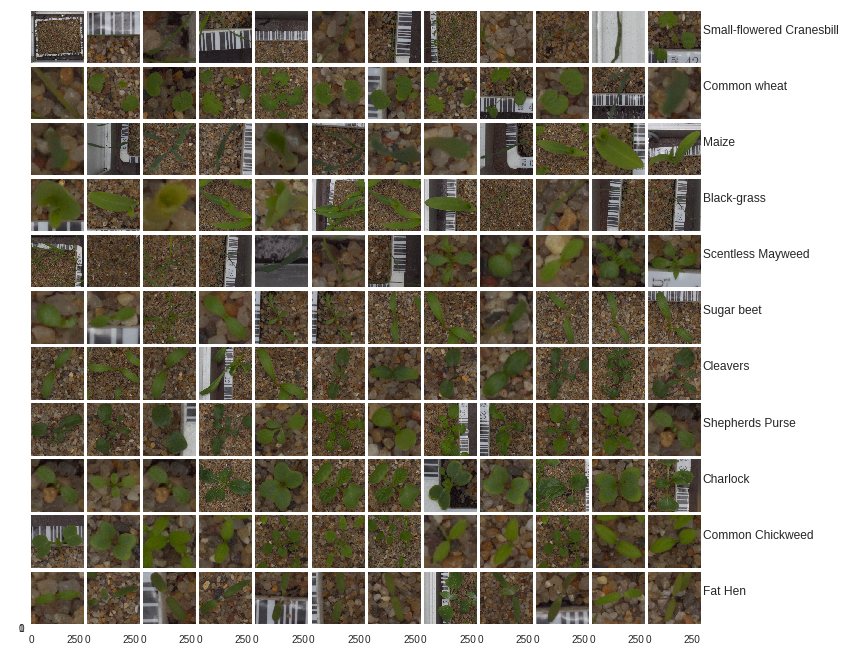

In [0]:
CATEGORIES = valid.file.values
NUM_CATEGORIES = len(CATEGORIES)

fig = plt.figure(1, figsize=(NUM_CATEGORIES, NUM_CATEGORIES))
grid = ImageGrid(fig, 111, nrows_ncols=(NUM_CATEGORIES, NUM_CATEGORIES), axes_pad=0.05)
i = 0
for category_id, category in enumerate(CATEGORIES):
  for j in range(NUM_CATEGORIES-1):
    for filepath in valid[valid['file'] == category]['filepath'].values[:NUM_CATEGORIES]:
        ax = grid[i]
        img = read_img(filepath, (299, 299))
        ax.imshow(img / 255.)
        ax.axis('off')
        if i % NUM_CATEGORIES == NUM_CATEGORIES - 1:
            ax.text(310, 112, filepath.split('/')[1], verticalalignment='center')
        i += 1
plt.show();


In [0]:
CATEGORIES

array(['Loose Silky-bent', 'Small-flowered Cranesbill', 'Common wheat',
       'Maize', 'Black-grass', 'Scentless Mayweed', 'Sugar beet',
       'Cleavers', 'Shepherds Purse', 'Charlock', 'Common Chickweed',
       'Fat Hen'], dtype=object)

In [0]:
predictions = model.predict_generator(
        validation_generator,
        steps = 15,
        verbose = 1)
predictions = np.argmax(predictions, axis = 1)
labels = validation_generator.class_indices
predictions = [list(labels.keys())[list(labels.values()).index(i)] for i in predictions]


15/15 [==============================] - 33s 2s/step


In [0]:
predictions[2:20]

['Small-flowered Cranesbill',
 'Cleavers',
 'Scentless Mayweed',
 'Sugar beet',
 'Sugar beet',
 'Fat Hen',
 'Charlock',
 'Sugar beet',
 'Black-grass',
 'Scentless Mayweed',
 'Common Chickweed',
 'Loose Silky-bent',
 'Cleavers',
 'Common Chickweed',
 'Scentless Mayweed',
 'Cleavers',
 'Loose Silky-bent',
 'Loose Silky-bent']

In [0]:
cnf_matrix = confusion_matrix([list(labels.keys())[list(labels.values()).index(i)] for i in validation_generator.classes], predictions)
abbreviation = validation_generator.class_indices

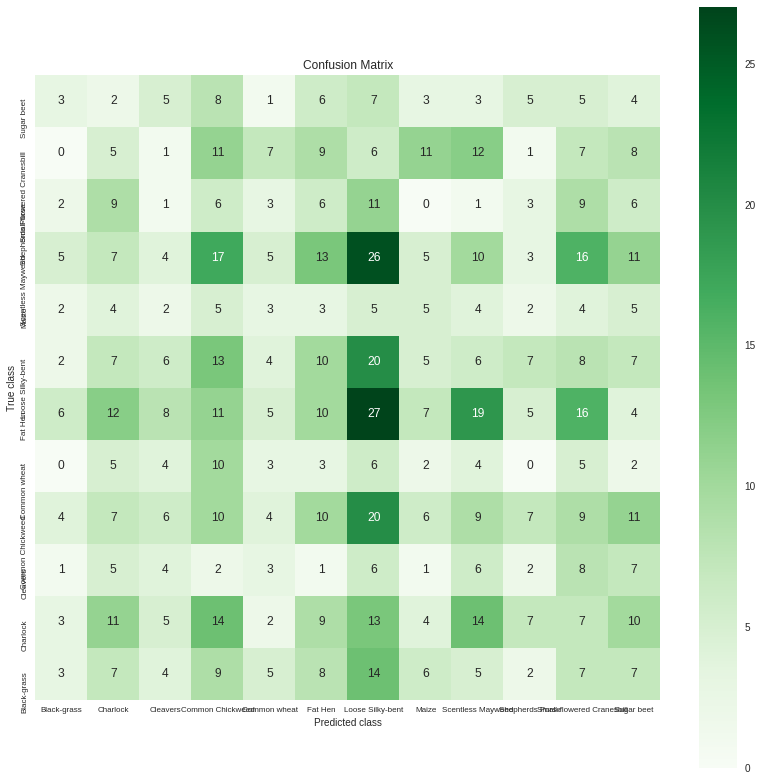

In [0]:
fig, ax = plt.subplots(1,figsize = (14,14))
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True, fmt = 'd')
ax.set_xticklabels(abbreviation, fontsize=8)
ax.set_yticklabels(abbreviation, fontsize=8)
ax.set_aspect('equal')
plt.title('Confusion Matrix')
plt.ylabel('True class',fontsize=10)
plt.xlabel('Predicted class',fontsize=10)
fig.savefig('Confusion matrix.png', dpi=600)
plt.show();